In [148]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [149]:
plt.style.use('default')

In [150]:
all_experiments = [
    "experiment-results/Exp 1.csv",
    "experiment-results/Exp 2.csv",
    "experiment-results/Exp 3.csv",
    "experiment-results/Exp 4.csv",
    "experiment-results/Exp 5.csv", 
]

In [151]:
all_exp_res = {
    0: [83.10, 83.10, 2.61, None],
    1: [85.00, 85.00, 1.20, None],
    2: [84.00, 84.10, 3.16, None],
    3: [80.00, 80.00, 3.94, "(Simulating Devices)"],
    4: [85.00, 85.00, 2.40, "(Simulating Devices)"],
}

In [152]:
org_model_size = 506.8

In [153]:
exp_index=0

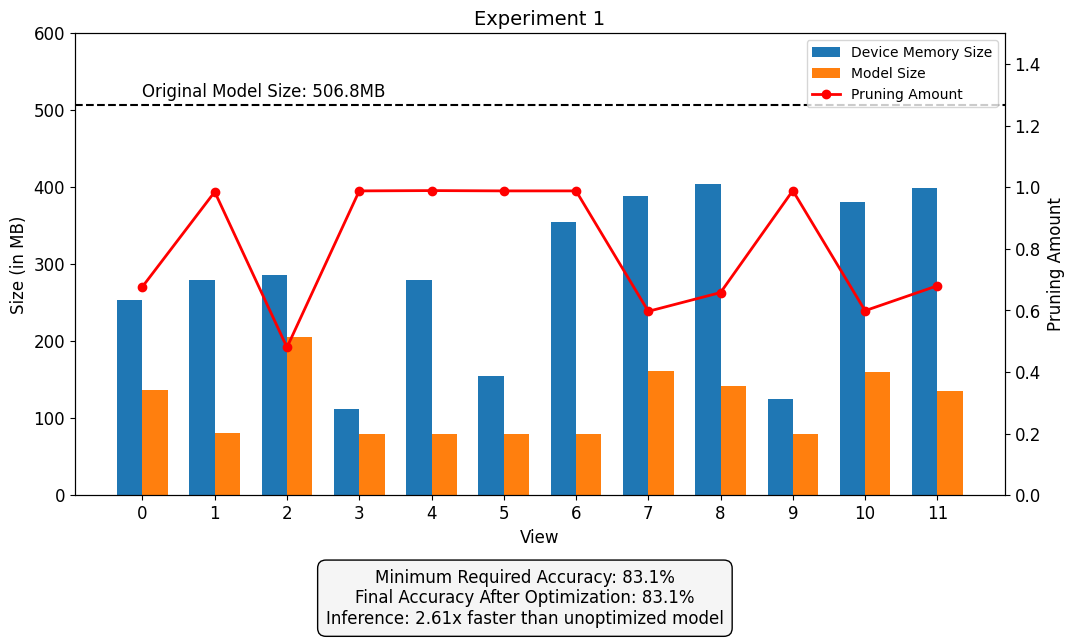

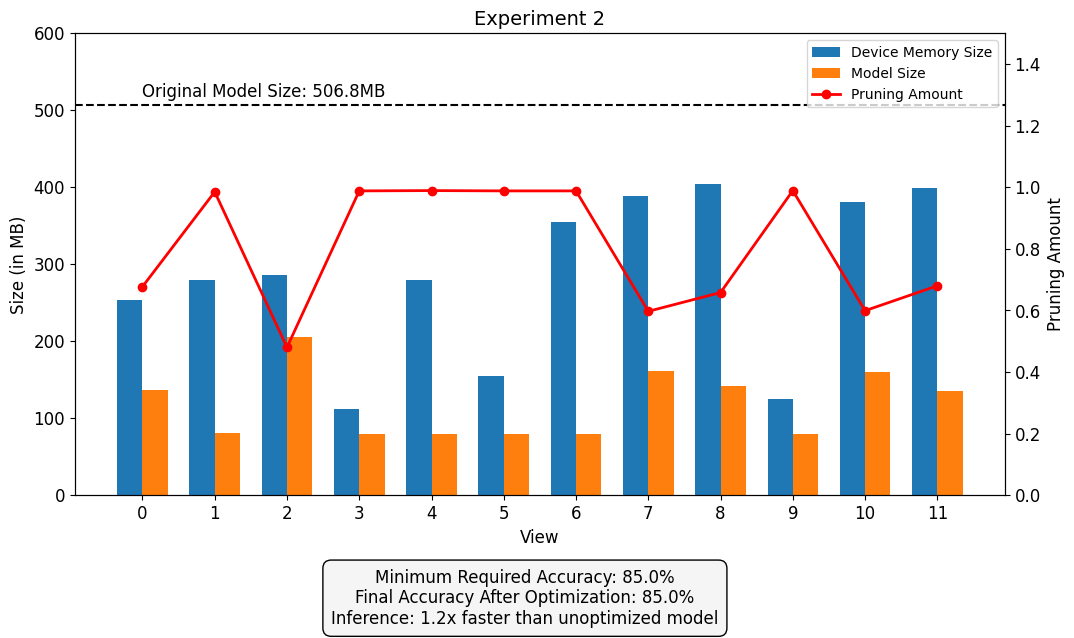

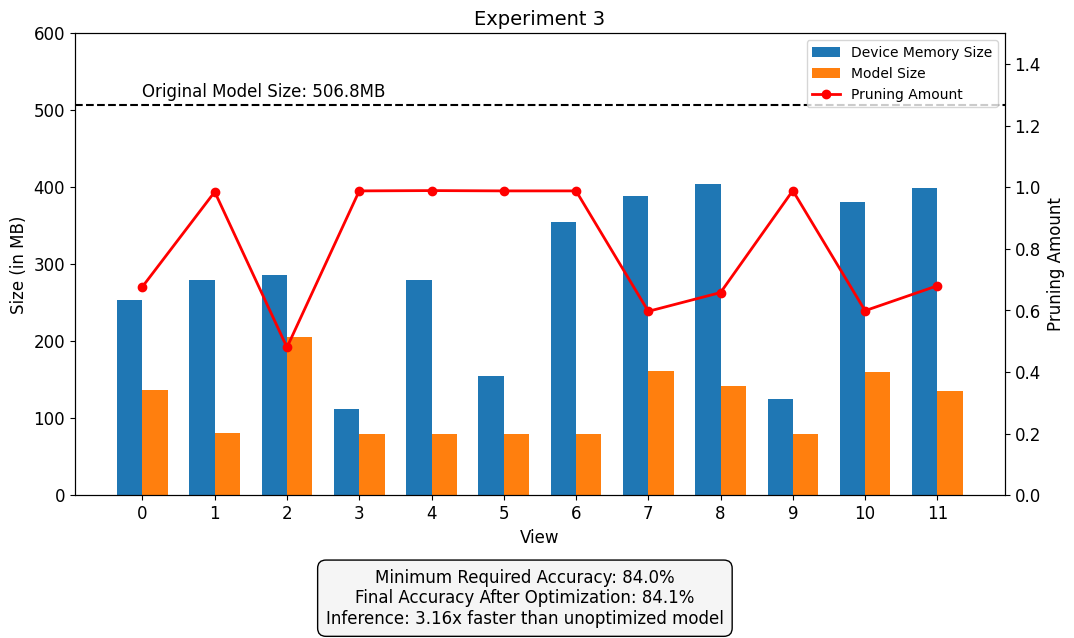

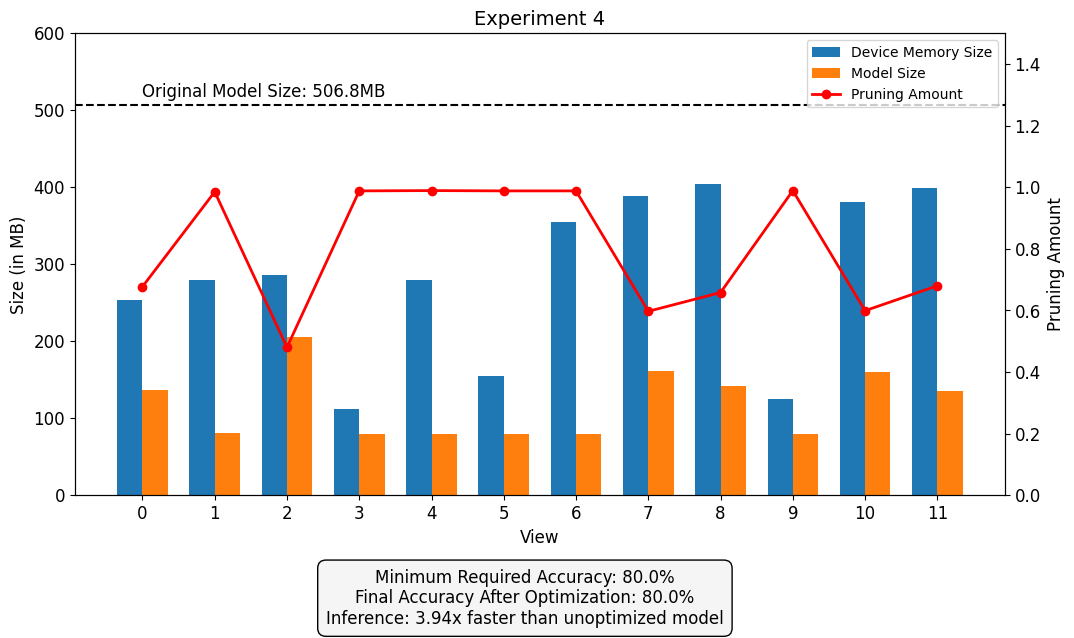

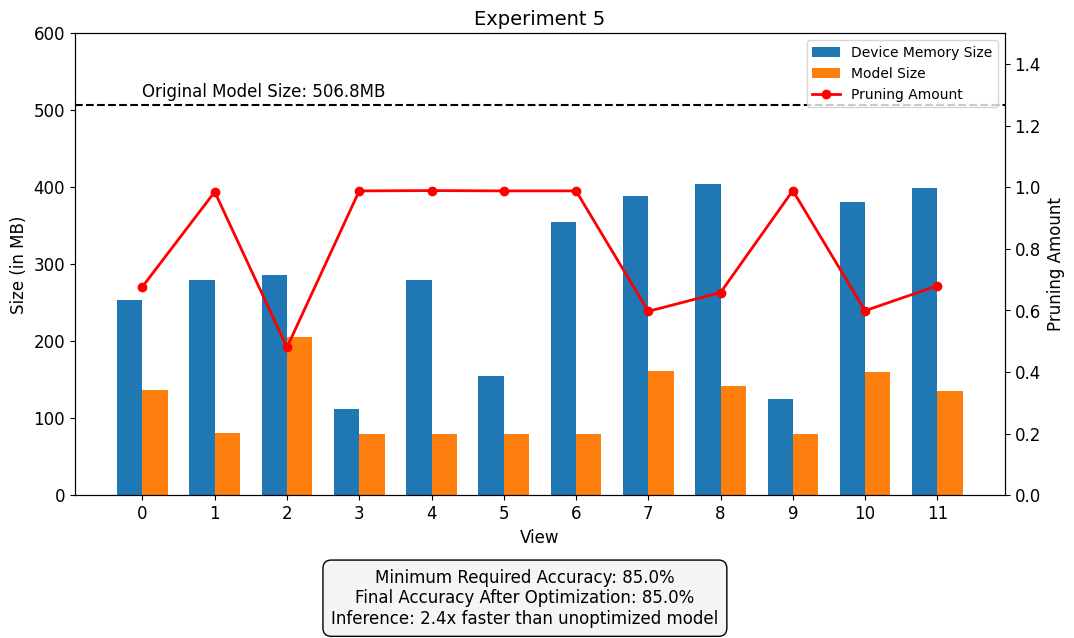

In [154]:
for exp_index, exp in enumerate(all_experiments):
    data = pd.read_csv(all_experiments[0])

    fig, ax1 = plt.subplots(figsize=(12, 6))
    width = 0.35

    ax1.set_ylim(0, 600)
    ax1.set_ylabel("Size (in MB)", fontsize=12)

    ax1.bar(data["View"]-width/2, data["Device Memory Size"], width=width, label="Device Memory Size")
    ax1.bar(data["View"]+width/2, data["Model Size"], width=width, label="Model Size")

    ax1.axhline(y=org_model_size, color='black', linestyle="--")
    ax1.text(x=0, y=org_model_size+5, s=f"Original Model Size: {org_model_size}MB", color="black", fontsize=12, va="bottom", ha="left"
    )

    ax2 = ax1.twinx()
    ax2.set_ylim(0, 1.5)
    ax2.set_ylabel("Pruning Amount", fontsize=12)

    ax2.plot(data["View"], data["Pruning Amount"], color='red', marker='o', label="Pruning Amount", linewidth=2)

    ax1.set_xticks(data["View"])
    ax1.set_xlabel("View", fontsize=12)
    fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

    plt.title(f"Experiment {exp_index+1}", fontsize=14)

    ax1.tick_params(axis='both', labelsize=12)
    ax2.tick_params(axis='y', labelsize=12)

    plt.figtext(0.5, -0.1, 
                f"Minimum Required Accuracy: {all_exp_res[exp_index][0]}%\nFinal Accuracy After Optimization: {all_exp_res[exp_index][1]}%\nInference: {all_exp_res[exp_index][2]}x faster than unoptimized model", 
                wrap=True, ha="center", fontsize=12,
                bbox=dict(facecolor="whitesmoke", edgecolor="black", boxstyle="round,pad=0.5"))

    plt.show()

In [155]:
pruning_res = pd.read_csv("experiment-results/Pruning Results.csv")

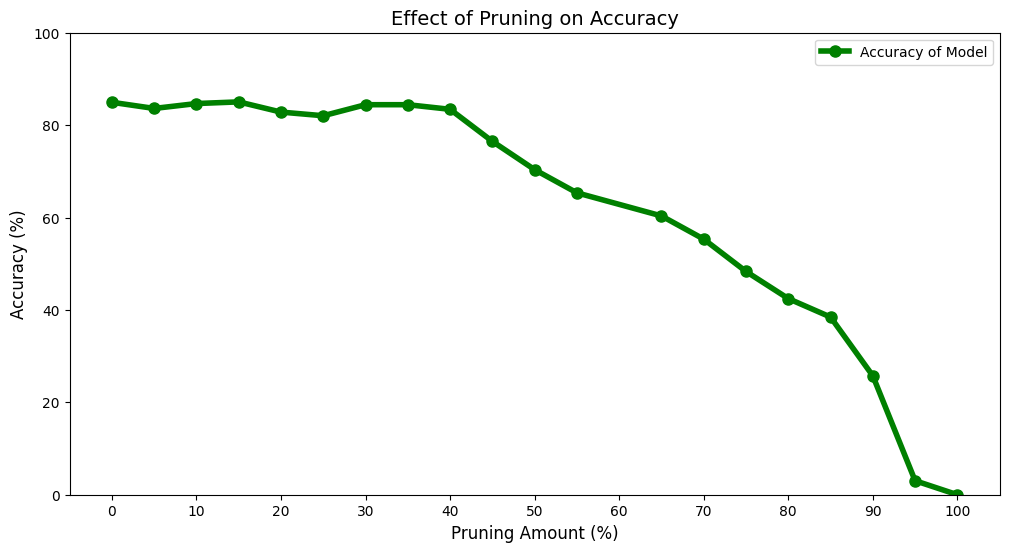

In [156]:
plt.figure(figsize=(12, 6))
plt.plot(pruning_res["Pruning Amount"], pruning_res["Accuracy"]*100, marker='o', markersize=8, linewidth=4, label="Accuracy of Model", color='green')
plt.xlabel("Pruning Amount (%)", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.ylim(0, 100)
plt.title("Effect of Pruning on Accuracy", fontsize=14)
plt.xticks(np.arange(0, 110, 10))
plt.legend()
plt.show()

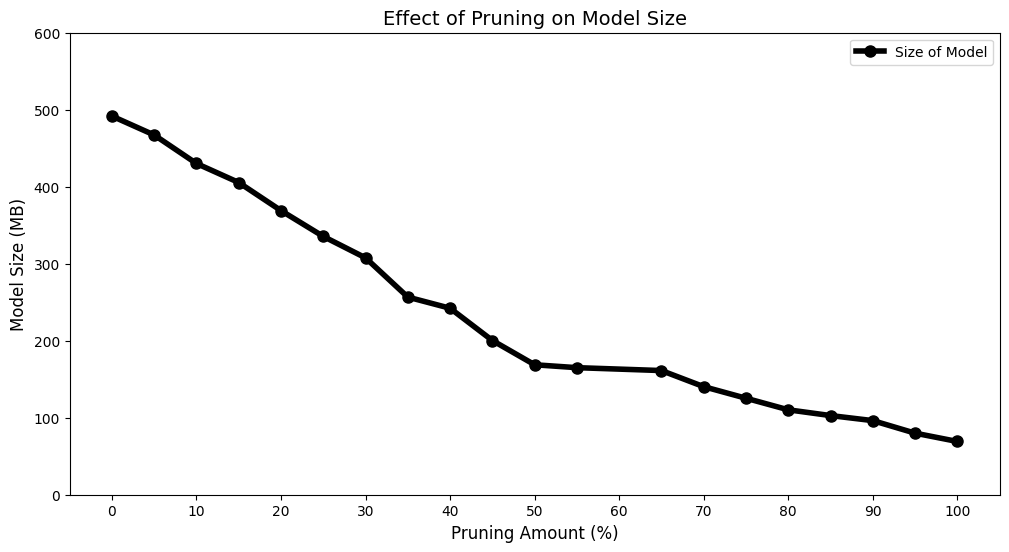

In [157]:
plt.figure(figsize=(12, 6))
plt.plot(pruning_res["Pruning Amount"], pruning_res["Model Size (MB)"], marker='o', markersize=8, linewidth=4, label="Size of Model", color="black")
plt.xlabel("Pruning Amount (%)", fontsize=12)
plt.ylabel("Model Size (MB)", fontsize=12)
plt.ylim(0, 600)
plt.title("Effect of Pruning on Model Size", fontsize=14)
plt.xticks(np.arange(0, 110, 10))
plt.legend()
plt.show()

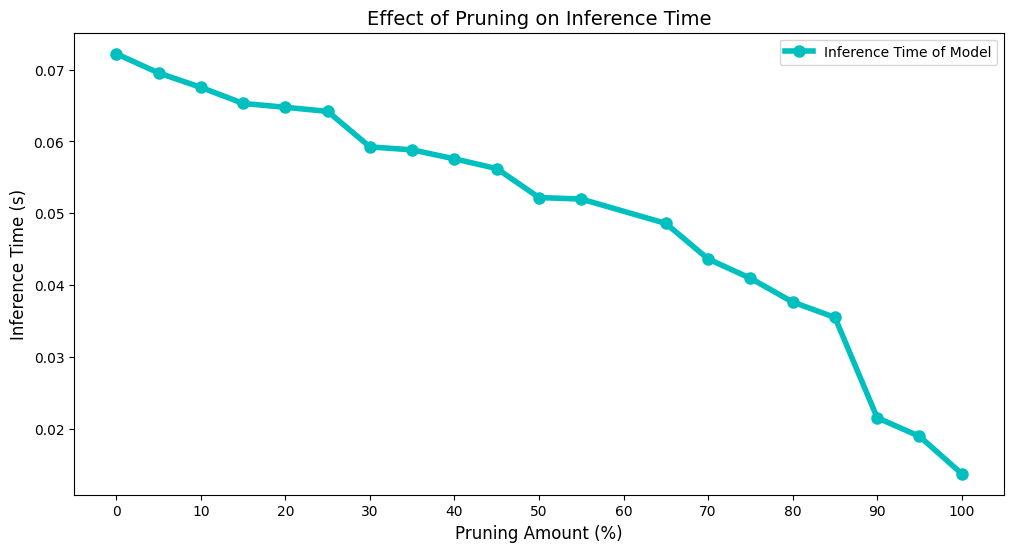

In [158]:
plt.figure(figsize=(12, 6))
plt.plot(pruning_res["Pruning Amount"], pruning_res["Computation Time (s)"]/np.sum(pruning_res["Computation Time (s)"]), 
         marker='o', markersize=8, linewidth=4, label="Inference Time of Model", color="c")
plt.xlabel("Pruning Amount (%)", fontsize=12)
plt.ylabel("Inference Time (s)", fontsize=12)
plt.title("Effect of Pruning on Inference Time", fontsize=14)
plt.xticks(np.arange(0, 110, 10))
plt.legend()
plt.show()

In [159]:
pruning_amounts = {}
for i, exp in enumerate(all_experiments):
    data = pd.read_csv(exp)
    pruning_amounts[i] = data["Pruning Amount"].values*100

In [160]:
def plot_i(max_idx):
    plt.figure(figsize=(18, 9))
    for idx, amt in pruning_amounts.items():
        plt.plot(range(1, len(amt)+1), amt, marker='o', markersize=idx+4, linewidth=idx+1, label=f"Accuracy: {all_exp_res[idx][1]}% {all_exp_res[idx][3] if all_exp_res[idx][3] else '(Using Random Values)'}")
        if idx == max_idx:
            break
    plt.xlabel("View", fontsize=16)
    plt.ylabel("Pruning Amount (%)", fontsize=16)
    plt.ylim(-10, 130)
    plt.title("Accuracy when using different pruning configurations", fontsize=18)
    plt.xticks(range(1, len(amt)+1))
    plt.legend(fontsize=14)

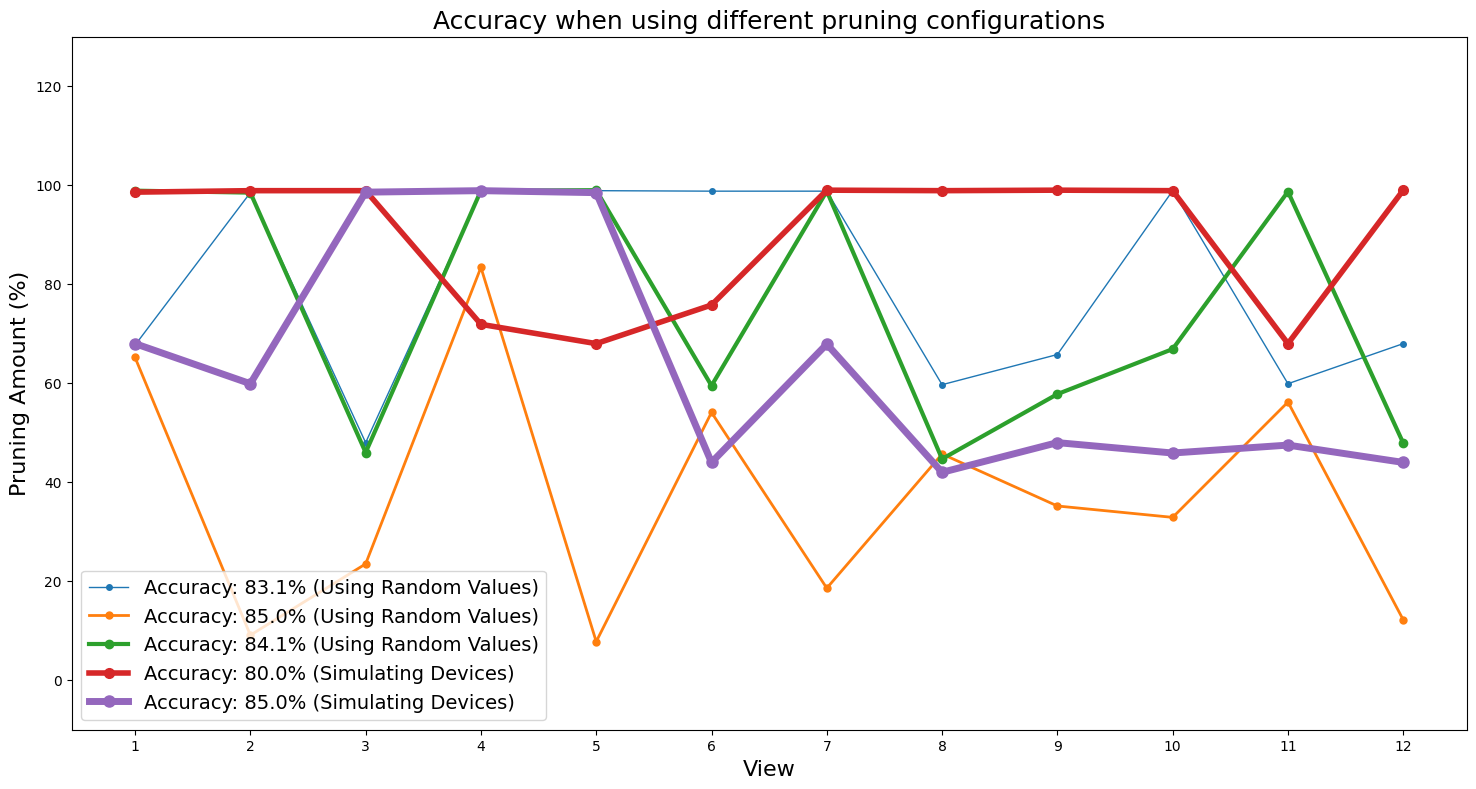

In [161]:
# for idx in range(len(pruning_amounts)):
#     plot_i(idx)
#     plt.show()
#     plt.close()

plot_i(len(pruning_amounts)-1)
plt.show()